In this chapter we cover
- Efficient markets hypothesis: strong form v. weak form
- Random walk
- persistence and regression to the mean
- Fundamental vs. Technical Analysis
- What the literature says: twitter+mood, momentum, january effect
- herd behavior, information cascades, private information, game theory
- red queen games
- trade people not prices - harder to uncover and more robust
- biases and errors: survivorship, data mining fallacy , stateful strategies

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [2]:
#!pip install pandas_datareader

In [3]:
#from pandas_datareader import data as pdr

# pip install multitasking
# pip install fix_yahoo_finance
#import fix_yahoo_finance as yf
#yf.pdr_override() #需要调用这个函数
# 获取数据
#spy = pdr.get_data_yahoo("SPY", start="2010-01-01", end="2016-03-01")

#导入标普500指数，SPY是美国股市标普指数期货，标准普尔500指数英文简写为S&P 500 Index，是记录美国500家上市公司的一个股票指数。俗称Spiders，跟踪S&P 500指数，股价大约是指数值的1/10；
CSV_PATH = r"e:\\python3\\stock\\spy.csv"
spy = pd.read_csv(CSV_PATH)
spy

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,112.769997,112.800003,111.389999,111.440002,93.934990,90637900
1,2010-01-04,112.370003,113.389999,111.510002,113.330002,95.528107,118944600
2,2010-01-05,113.260002,113.680000,112.849998,113.629997,95.780975,111579900
3,2010-01-06,113.519997,113.989998,113.430000,113.709999,95.848396,116074400
4,2010-01-07,113.500000,114.330002,113.180000,114.190002,96.253014,131091100
5,2010-01-08,113.889999,114.620003,113.660004,114.570000,96.573311,126402800
6,2010-01-11,115.080002,115.129997,114.239998,114.730003,96.708183,106375700
7,2010-01-12,113.970001,114.209999,113.220001,113.660004,95.806274,163333500
8,2010-01-13,113.949997,114.940002,113.370003,114.620003,96.615456,161822000
9,2010-01-14,114.489998,115.139999,114.419998,114.930000,96.876770,115718800


In [4]:
#获取收盘价
spy_c = spy['Close']

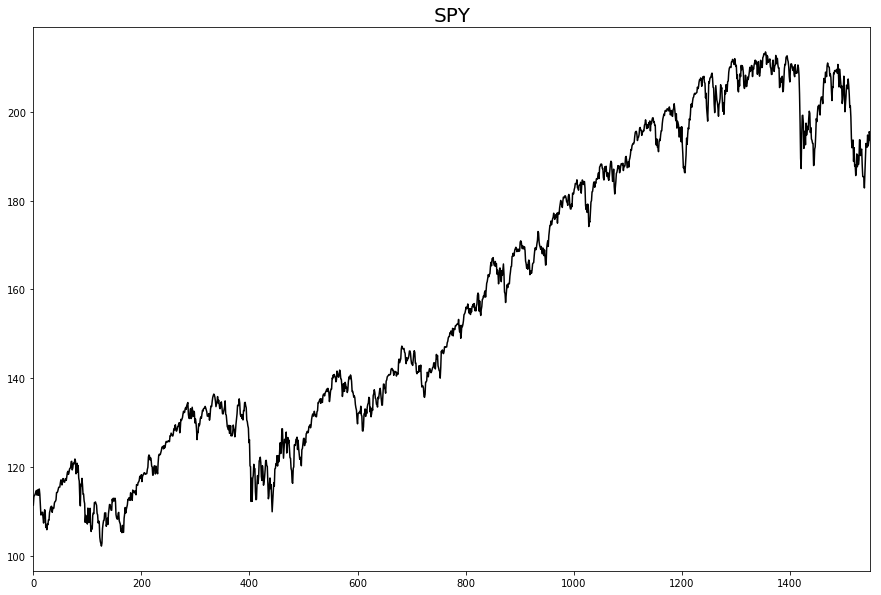

In [5]:
#绘制折线图
fig, ax = plt.subplots(figsize=(15,10))
spy_c.plot(color='k')
plt.title("SPY", fontsize=20)

In [6]:
#第一行数据 2010-01-04,112.370003
first_open = spy['Open'].iloc[0]
first_open

112.769997

In [7]:
#iloc中的-1代表最后一行，并获取收盘价，2016-03-01,195.009995,198.210007,194.449997,198.110001,
last_close = spy['Close'].iloc[-1]
last_close

193.55999800000001

In [15]:
#每股收益(2010-01-04 至 2016-03-01) = 最后一天收盘价 减 第一天的开盘价
last_close - first_open

80.790001000000004

In [16]:
#每天盘中一天的收益（当天收盘价 - 开盘价），并生成新的列
spy['Daily Change'] = pd.Series(spy['Close'] - spy['Open'])

In [17]:
#每天交易策略：开盘买入，收盘卖出，收益总和
#发现每天频繁交易收益率不如一直持有
spy['Daily Change'].sum()

25.90017800000014

In [18]:
#使用numpy计算盘中交易的标准差
np.std(spy['Daily Change'])

1.1651768203991626

In [19]:
#获取隔夜交易收益，当天开盘价 减 前一天的收盘价，shift(1) 上移一天
spy['Overnight Change'] = pd.Series(spy['Open'] - spy['Close'].shift(1))

In [20]:
#隔夜交易收益
spy['Overnight Change'].sum()

54.889822999999865

In [21]:
#标准差，体现收益的波动性
np.std(spy['Overnight Change'])

0.9134628292561012

In [22]:
# 交易策略1：每日交易策略，每日回报率=（当前的收盘价 - 上一交易日的收盘价）/上一交易日收盘价
daily_rtn = ((spy['Close'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100
daily_rtn

0            NaN
1       1.695980
2       0.264709
3       0.070406
4       0.422129
5       0.332777
6       0.139655
7      -0.932624
8       0.844623
9       0.270456
10     -1.122423
11      1.249559
12     -1.016860
13     -1.922910
14     -2.229184
15      0.512772
16     -0.419057
17      0.475715
18     -1.147229
19     -1.086857
20      1.555079
21      1.210342
22     -0.498274
23     -3.086588
24      0.206691
25     -0.721925
26      1.256022
27     -0.195858
28      1.046626
29     -0.083229
          ...   
1520   -2.146613
1521    0.133113
1522   -1.281508
1523    0.560198
1524    2.051530
1525   -1.511655
1526    1.364314
1527   -1.088324
1528    0.520914
1529    2.437735
1530   -0.036138
1531   -1.802215
1532    0.599495
1533    0.156823
1534   -1.905015
1535   -1.346102
1536    0.005390
1537   -0.086280
1538   -1.300806
1539    2.061689
1540    1.687828
1541    1.633474
1542   -0.409586
1543   -0.046851
1544    1.447916
1545   -1.262959
1546    0.457565
1547    1.2111

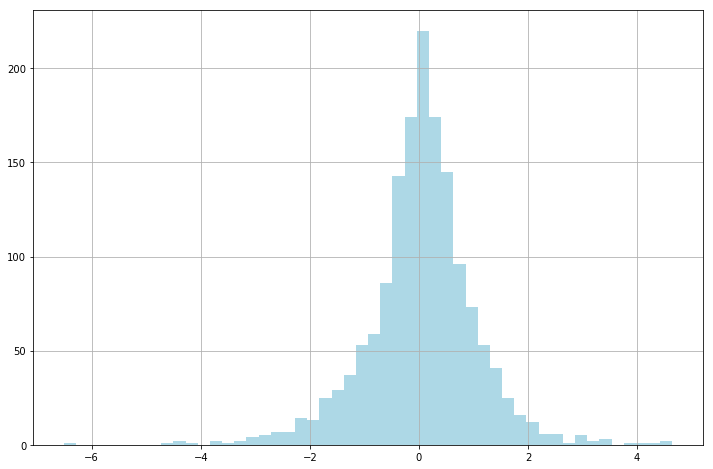

In [23]:
#绘制直方图，x轴为每日波动数（当前的收盘价 - 上一交易日的收盘价），y轴是对应x轴价格的总数量
#直方图的 bins 数目即区间数
daily_rtn.hist(bins=50, color='lightblue', figsize=(12,8))

In [24]:
# 日间交易：收益 = 当天收盘价 - 当天开盘价
id_rtn = ((spy['Close'] - spy['Open'])/spy['Open'])*100
id_rtn

0      -1.179387
1       0.854320
2       0.326678
3       0.167373
4       0.607931
5       0.597068
6      -0.304135
7      -0.271999
8       0.587982
9       0.384315
10     -0.950060
11      1.267378
12     -0.341267
13     -1.948737
14     -1.789567
15     -0.399240
16     -0.027436
17      0.604565
18     -1.470190
19     -1.513208
20      0.841420
21      1.025073
22     -0.045500
23     -2.330704
24      0.093849
25     -0.796327
26      0.084014
27     -0.037367
28      1.178997
29      0.981403
          ...   
1520    0.556831
1521   -1.000215
1522    0.335078
1523    0.257771
1524    0.389928
1525   -1.200505
1526    0.944697
1527   -0.764847
1528   -0.447466
1529    1.947162
1530    0.581725
1531   -0.937697
1532   -0.057469
1533    0.466677
1534   -1.591711
1535   -0.188408
1536    1.128922
1537   -0.611555
1538    0.285184
1539    0.902897
1540    0.535040
1541    0.899770
1542   -0.574535
1543    0.434170
1544    0.469389
1545   -0.865976
1546    1.348157
1547    0.9342

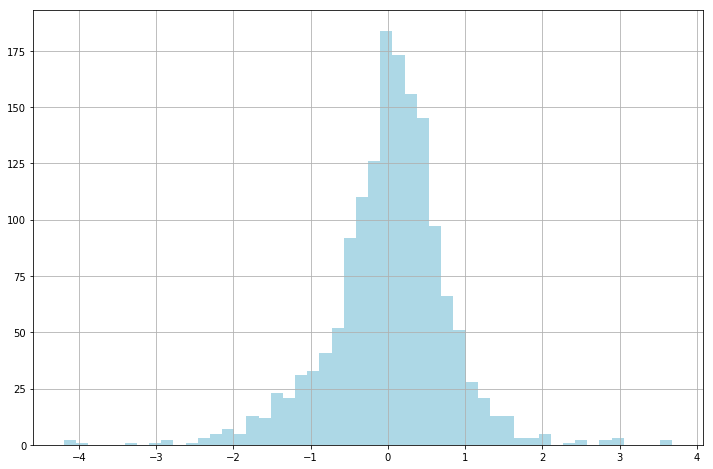

In [25]:
#日间交易直方图
id_rtn.hist(bins=50, color='lightblue', figsize=(12,8))

In [26]:
# 隔夜交易策略：隔夜交易收益率 = （当天开盘价 - 上一天收盘价）/上一天收盘价
on_rtn = ((spy['Open'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100
on_rtn

0            NaN
1       0.834531
2      -0.061767
3      -0.096805
4      -0.184679
5      -0.262723
6       0.445144
7      -0.662427
8       0.255141
9      -0.113423
10     -0.174016
11     -0.017596
12     -0.677906
13      0.026340
14     -0.447628
15      0.915667
16     -0.391729
17     -0.128076
18      0.327779
19      0.432901
20      0.707704
21      0.183389
22     -0.452981
23     -0.773922
24      0.112736
25      0.074999
26      1.171025
27     -0.158551
28     -0.130828
29     -1.054286
          ...   
1520   -2.688475
1521    1.144779
1522   -1.611187
1523    0.301650
1524    1.655149
1525   -0.314931
1526    0.415689
1527   -0.325970
1528    0.972733
1529    0.481203
1530   -0.614290
1531   -0.872702
1532    0.657341
1533   -0.308414
1534   -0.318372
1535   -1.159879
1536   -1.110990
1537    0.528507
1538   -1.581480
1539    1.148423
1540    1.146653
1541    0.727160
1542    0.165902
1543   -0.478941
1544    0.973956
1545   -0.400451
1546   -0.878745
1547    0.2743

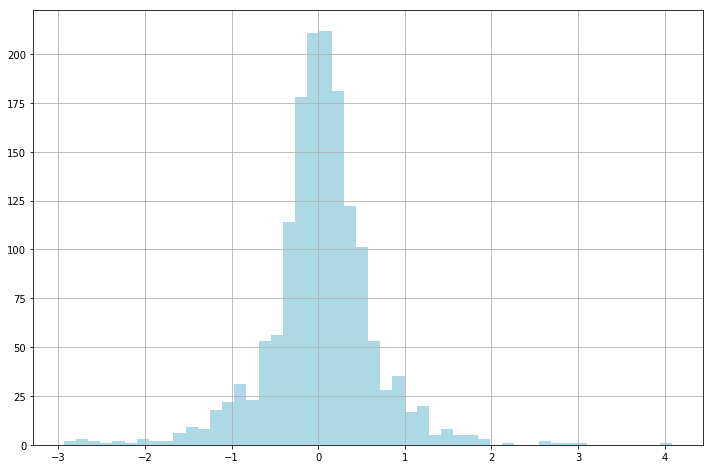

In [27]:
#隔夜交易策略直方图
on_rtn.hist(bins=50, color='lightblue', figsize=(12,8))

In [28]:
#统计信息方法
def get_stats(s, n=252):
    #删除NaN数据
    s = s.dropna()
    #盈利次数：获取每日收益率大于0的所有数据，并计算总数
    wins = len(s[s>0])
    #亏损次数：获取每日收益率小于0的所有数据，并计算总数
    losses = len(s[s<0])
    #盈亏平衡次数：获取每日收益率等于0的所有数据，并计算总数
    evens = len(s[s==0])
    #盈利平均值，round四舍五入，3为小数位数
    mean_w = round(s[s>0].mean(), 3)
    #亏损平均值
    mean_l = round(s[s<0].mean(), 3)
    #盈利亏损比例
    win_r = round(wins/losses, 3)
    #平均收益
    mean_trd = round(s.mean(), 3)
    #标准差
    sd = round(np.std(s), 3)
    #最大亏损
    max_l = round(s.min(), 3)
    #最大盈利
    max_w = round(s.max(), 3)
    #夏普比率：代表投资人每多承担一分风险，可以拿到几分超额报酬；若为正值，代表基金报酬率高过波动风险；若为负值，代表基金操作风险大过于报酬率。
    #每个投资组合都可以计算Sharpe Ratio,即投资回报与多冒风险的比例，这个比例越高，投资组合越佳。
    #夏普比率 = （ E(Rp) - Rf ）/ σp  其中E(Rp)：投资组合预期报酬率 Rf：无风险利率 σp：投资组合的标准差
    #夏普比率 = （平均收益/标准差）* n=252的平方根 , 最后四舍五入
    #注：年波动率等于收益率的标准差除以其均值，再除以交易日倒数的平方根，通常交易日取252 天。
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    #交易次数
    cnt = len(s)
    print('交易次数:', cnt,\
          '\n盈利次数:', wins,\
          '\n亏损次数:', losses,\
          '\n盈亏平衡次数:', evens,\
          '\n盈利亏损比例', win_r,\
          '\n盈利平均值:', mean_w,\
          '\n亏损平均值:', mean_l,\
          '\n平均收益', mean_trd,\
          '\n标准差:', sd,\
          '\n最大亏损:', max_l,\
          '\n最大盈利:', max_w,\
          '\n夏普比率:', sharpe_r)

In [29]:
#日间交易策略统计信息
get_stats(id_rtn)

交易次数: 1550 
盈利次数: 848 
亏损次数: 691 
盈亏平衡次数: 11 
盈利亏损比例 1.227 
盈利平均值: 0.516 
亏损平均值: -0.599 
平均收益 0.015 
标准差: 0.765 
最大亏损: -4.196 
最大盈利: 3.683 
夏普比率: 0.3178


In [30]:
#每日交易策略统计信息
get_stats(daily_rtn)

交易次数: 1549 
盈利次数: 846 
亏损次数: 697 
盈亏平衡次数: 6 
盈利亏损比例 1.214 
盈利平均值: 0.689 
亏损平均值: -0.745 
平均收益 0.041 
标准差: 1.008 
最大亏损: -6.512 
最大盈利: 4.65 
夏普比率: 0.6414


In [31]:
#隔夜交易策略统计信息
get_stats(on_rtn)

交易次数: 1549 
盈利次数: 823 
亏损次数: 712 
盈亏平衡次数: 14 
盈利亏损比例 1.156 
盈利平均值: 0.419 
亏损平均值: -0.432 
平均收益 0.024 
标准差: 0.614 
最大亏损: -2.936 
最大盈利: 4.09 
夏普比率: 0.6297


In [32]:
#随机产生1或0
def get_signal(x):
    val = np.random.rand()
    if val > .5:
        return 1
    else:
        return 0

In [33]:
#产生新列，从Signal_0到Signal_999, axis=1 表示从上到小的垂直方向，设置随机产生的1或0
for i in range(1000):
    spy['Signal_' + str(i)] = spy.apply(get_signal, axis=1)

In [34]:
spy

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Change,Overnight Change,Signal_0,...,Signal_990,Signal_991,Signal_992,Signal_993,Signal_994,Signal_995,Signal_996,Signal_997,Signal_998,Signal_999
0,2009-12-31,112.769997,112.800003,111.389999,111.440002,93.934990,90637900,-1.329995,NaN,0,...,0,0,0,0,1,1,0,0,0,1
1,2010-01-04,112.370003,113.389999,111.510002,113.330002,95.528107,118944600,0.959999,0.930001,1,...,0,0,1,0,0,0,1,1,0,1
2,2010-01-05,113.260002,113.680000,112.849998,113.629997,95.780975,111579900,0.369995,-0.070000,1,...,0,1,0,1,0,0,1,0,1,1
3,2010-01-06,113.519997,113.989998,113.430000,113.709999,95.848396,116074400,0.190002,-0.110000,0,...,0,1,1,1,0,1,1,0,1,1
4,2010-01-07,113.500000,114.330002,113.180000,114.190002,96.253014,131091100,0.690002,-0.209999,1,...,1,0,1,0,0,0,1,0,0,1
5,2010-01-08,113.889999,114.620003,113.660004,114.570000,96.573311,126402800,0.680001,-0.300003,1,...,0,0,1,1,0,1,1,1,1,0
6,2010-01-11,115.080002,115.129997,114.239998,114.730003,96.708183,106375700,-0.349999,0.510002,0,...,0,0,1,0,0,1,0,1,0,1
7,2010-01-12,113.970001,114.209999,113.220001,113.660004,95.806274,163333500,-0.309997,-0.760002,1,...,0,1,0,0,0,0,0,0,0,0
8,2010-01-13,113.949997,114.940002,113.370003,114.620003,96.615456,161822000,0.670006,0.289993,0,...,0,1,0,1,0,0,1,0,0,0
9,2010-01-14,114.489998,115.139999,114.419998,114.930000,96.876770,115718800,0.440002,-0.130005,0,...,0,1,1,0,0,1,0,1,0,1


In [35]:
#spy.to_csv('/Users/alexcombs/Downloads/spy.csv', index=False)
#spy = pd.read_csv('E:\\python3\\stock\\spy.csv')
#spy.drop([x for x in spy.columns is 'Signal' in x])

In [36]:
#sumd={}
#for i in range(1000):
#    sumd.update({i: np.where(spy['Signal_' + str(i)].iloc[1:]==1, spy['Overnight Change'].iloc[1:],0).sum()})

In [37]:
#returns = pd.Series(sumd).to_frame('return').sort_values('return', ascending=0)

In [38]:
#returns

In [39]:
#mystery_rtn = pd.Series(np.where(spy['Signal_270'].iloc[1:]==1,spy['Overnight Change'].iloc[1:],0))

In [40]:
#get_stats(mystery_rtn)

In [47]:
#from pandas_datareader import data as pdr

# -- pip install multitasking
# -- pip install fix_yahoo_finance
#import fix_yahoo_finance as yf
#yf.pdr_override() #需要调用这个函数
 
# 获取数据
#spy = pdr.get_data_yahoo("SPY", start="2010-01-01", end="2016-03-01")

# 获取数据
sp = pd.read_csv('E:\\python3\\stock\\spy.csv')

In [48]:
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,112.769997,112.800003,111.389999,111.440002,93.934990,90637900
1,2010-01-04,112.370003,113.389999,111.510002,113.330002,95.528107,118944600
2,2010-01-05,113.260002,113.680000,112.849998,113.629997,95.780975,111579900
3,2010-01-06,113.519997,113.989998,113.430000,113.709999,95.848396,116074400
4,2010-01-07,113.500000,114.330002,113.180000,114.190002,96.253014,131091100
5,2010-01-08,113.889999,114.620003,113.660004,114.570000,96.573311,126402800
6,2010-01-11,115.080002,115.129997,114.239998,114.730003,96.708183,106375700
7,2010-01-12,113.970001,114.209999,113.220001,113.660004,95.806274,163333500
8,2010-01-13,113.949997,114.940002,113.370003,114.620003,96.615456,161822000
9,2010-01-14,114.489998,115.139999,114.419998,114.930000,96.876770,115718800


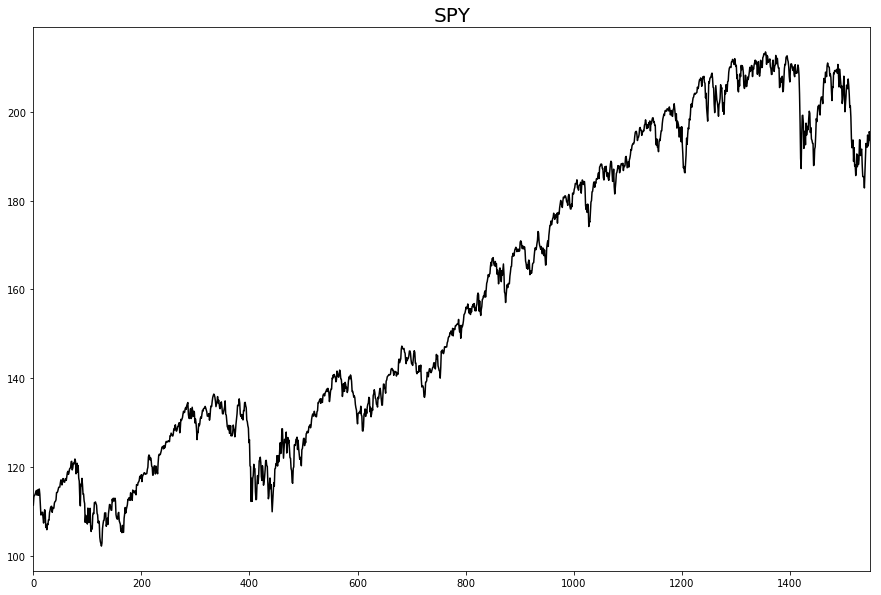

In [49]:
#绘制收盘价折线图
fig, ax = plt.subplots(figsize=(15,10))
sp['Close'].plot(color='k')
plt.title("SPY", fontsize=20)

In [50]:
#每日交易策略
long_day_rtn = ((sp['Close'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [51]:
#每日交易策略，每一股总收益
(sp['Close'] - sp['Close'].shift(1)).sum()

82.119996

In [52]:
#每日交易收益情况
get_stats(long_day_rtn)

交易次数: 1549 
盈利次数: 846 
亏损次数: 697 
盈亏平衡次数: 6 
盈利亏损比例 1.214 
盈利平均值: 0.689 
亏损平均值: -0.745 
平均收益 0.041 
标准差: 1.008 
最大亏损: -6.512 
最大盈利: 4.65 
夏普比率: 0.6414


In [53]:
#日间交易策略，每日的收益率
long_id_rtn = ((sp['Close'] - sp['Open'])/sp['Open'])*100

In [54]:
#日间交易策略，每一股总收益
(sp['Close'] - sp['Open']).sum()

25.90017800000014

In [55]:
#日间交易统计信息
get_stats(long_id_rtn)

交易次数: 1550 
盈利次数: 848 
亏损次数: 691 
盈亏平衡次数: 11 
盈利亏损比例 1.227 
盈利平均值: 0.516 
亏损平均值: -0.599 
平均收益 0.015 
标准差: 0.765 
最大亏损: -4.196 
最大盈利: 3.683 
夏普比率: 0.3178


In [56]:
#隔夜交易统计信息
long_on_rtn = ((sp['Open'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [57]:
#隔夜交易策略，每一股收益总和
(sp['Open'] - sp['Close'].shift(1)).sum()

54.889822999999865

In [58]:
#隔夜交易统计信息
get_stats(long_on_rtn)

交易次数: 1549 
盈利次数: 823 
亏损次数: 712 
盈亏平衡次数: 14 
盈利亏损比例 1.156 
盈利平均值: 0.419 
亏损平均值: -0.432 
平均收益 0.024 
标准差: 0.614 
最大亏损: -2.936 
最大盈利: 4.09 
夏普比率: 0.6297


In [59]:
#当天的收盘价，在逐一附加过去20天收盘价格
for i in range(1, 21, 1):
    sp.loc[:,'Close Minus ' + str(i)] = sp['Close'].shift(i)

In [60]:
sp

,Date,Open,High,Low,Close,Adj Close,Volume,Close Minus 1,Close Minus 2,Close Minus 3,...,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
0,2009-12-31,112.769997,112.800003,111.389999,111.440002,93.934990,90637900,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-04,112.370003,113.389999,111.510002,113.330002,95.528107,118944600,111.440002,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-05,113.260002,113.680000,112.849998,113.629997,95.780975,111579900,113.330002,111.440002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-06,113.519997,113.989998,113.430000,113.709999,95.848396,116074400,113.629997,113.330002,111.440002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-07,113.500000,114.330002,113.180000,114.190002,96.253014,131091100,113.709999,113.629997,113.330002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-01-08,113.889999,114.620003,113.660004,114.570000,96.573311,126402800,114.190002,113.709999,113.629997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-01-11,115.080002,115.129997,114.239998,114.730003,96.708183,106375700,114.570000,114.190002,113.709999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-01-12,113.970001,114.209999,113.220001,113.660004,95.806274,163333500,114.730003,114.570000,114.190002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2010-01-13,113.949997,114.940002,113.370003,114.620003,96.615456,161822000,113.660004,114.730003,114.570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-01-14,114.489998,115.139999,114.419998,114.930000,96.876770,115718800,114.620003,113.660004,114.730003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#列名条件过滤，只要Close,及包含 有Close Minus字符串的列
sp20 = sp[[x for x in sp.columns if 'Close Minus' in x or x == 'Close']].iloc[20:,]

In [63]:
sp20

,Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,...,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
20,109.059998,107.389999,108.570000,109.830002,109.309998,109.769997,109.209999,111.699997,113.889999,115.059998,...,114.930000,114.620003,113.660004,114.730003,114.570000,114.190002,113.709999,113.629997,113.330002,111.440002
21,110.379997,109.059998,107.389999,108.570000,109.830002,109.309998,109.769997,109.209999,111.699997,113.889999,...,113.639999,114.930000,114.620003,113.660004,114.730003,114.570000,114.190002,113.709999,113.629997,113.330002
22,109.830002,110.379997,109.059998,107.389999,108.570000,109.830002,109.309998,109.769997,109.209999,111.699997,...,115.059998,113.639999,114.930000,114.620003,113.660004,114.730003,114.570000,114.190002,113.709999,113.629997
23,106.440002,109.830002,110.379997,109.059998,107.389999,108.570000,109.830002,109.309998,109.769997,109.209999,...,113.889999,115.059998,113.639999,114.930000,114.620003,113.660004,114.730003,114.570000,114.190002,113.709999
24,106.660004,106.440002,109.830002,110.379997,109.059998,107.389999,108.570000,109.830002,109.309998,109.769997,...,111.699997,113.889999,115.059998,113.639999,114.930000,114.620003,113.660004,114.730003,114.570000,114.190002
25,105.889999,106.660004,106.440002,109.830002,110.379997,109.059998,107.389999,108.570000,109.830002,109.309998,...,109.209999,111.699997,113.889999,115.059998,113.639999,114.930000,114.620003,113.660004,114.730003,114.570000
26,107.220001,105.889999,106.660004,106.440002,109.830002,110.379997,109.059998,107.389999,108.570000,109.830002,...,109.769997,109.209999,111.699997,113.889999,115.059998,113.639999,114.930000,114.620003,113.660004,114.730003
27,107.010002,107.220001,105.889999,106.660004,106.440002,109.830002,110.379997,109.059998,107.389999,108.570000,...,109.309998,109.769997,109.209999,111.699997,113.889999,115.059998,113.639999,114.930000,114.620003,113.660004
28,108.129997,107.010002,107.220001,105.889999,106.660004,106.440002,109.830002,110.379997,109.059998,107.389999,...,109.830002,109.309998,109.769997,109.209999,111.699997,113.889999,115.059998,113.639999,114.930000,114.620003
29,108.040001,108.129997,107.010002,107.220001,105.889999,106.660004,106.440002,109.830002,110.379997,109.059998,...,108.570000,109.830002,109.309998,109.769997,109.209999,111.699997,113.889999,115.059998,113.639999,114.930000


In [64]:
#将列的顺序颠倒,从左到右就是最早时间到最晚时间
sp20 = sp20.iloc[:,::-1]

In [65]:
sp20

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,...,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
20,111.440002,113.330002,113.629997,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,...,115.059998,113.889999,111.699997,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998
21,113.330002,113.629997,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,...,113.889999,111.699997,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997
22,113.629997,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,...,111.699997,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002
23,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,...,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002
24,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,111.699997,...,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002,106.660004
25,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,111.699997,109.209999,...,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002,106.660004,105.889999
26,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,111.699997,109.209999,109.769997,...,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002,106.660004,105.889999,107.220001
27,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,111.699997,109.209999,109.769997,109.309998,...,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002,106.660004,105.889999,107.220001,107.010002
28,114.620003,114.930000,113.639999,115.059998,113.889999,111.699997,109.209999,109.769997,109.309998,109.830002,...,107.389999,109.059998,110.379997,109.830002,106.440002,106.660004,105.889999,107.220001,107.010002,108.129997
29,114.930000,113.639999,115.059998,113.889999,111.699997,109.209999,109.769997,109.309998,109.830002,108.570000,...,109.059998,110.379997,109.830002,106.440002,106.660004,105.889999,107.220001,107.010002,108.129997,108.040001


In [69]:
#使用scikit learn的向量机建模
#预测内容：从当天的收盘价去预测明天的收盘价，如已知2010-01-04的收盘价信息，想预测假定仍未发生交易的2010-01-05的收盘价
#这是每个人的梦想
from sklearn.svm import SVR

In [70]:
clf = SVR(kernel='linear')

In [71]:
len(sp20)

1530

In [72]:
#X数组使用最后的530条记录用于测试，其余1000条用于机器学习
X_train = sp20[:-530]
#Y数组仅有一列，Close：收盘价
#一样也是使用最后530用于测试，其余1000条用于机器学习
#Y,上移一位，如2010-01-04交易数据，训练对应的应变量是2010-01-05日期的交易数据
y_train = sp20['Close'].shift(-1)[:-530]

In [73]:
#用于测试的X数组从1000条到1530条
X_test = sp20[-1530:-1000]
#用于测试的X数组从1000条到1530条
#上移一位，如2010-01-04交易数据，训练对应的应变量是2010-01-05日期的交易数据
y_test = sp20['Close'].shift(-1)[-1530:-1000]

In [74]:
#用训练数据机器学习
model = clf.fit(X_train, y_train)

In [75]:
#用测试数据预测，方便和实际结果对比，并判断准确率
preds = model.predict(X_test)

In [76]:
preds

array([ 109.30784771,  110.35752709,  110.16404872,  106.92491922,
        106.71542274,  106.14676273,  107.48227893,  107.82692989,
        108.34340427,  108.18203742,  109.85383969,  110.66695257,
        110.95135835,  111.04959624,  111.0605371 ,  110.21647801,
        111.21975832,  110.90808239,  110.62591718,  112.21080114,
        112.52621575,  112.55507272,  112.48834554,  114.13608548,
        114.33645617,  114.60406984,  115.01682732,  115.60565637,
        115.55200613,  115.67407186,  116.52638604,  117.2608721 ,
        117.212851  ,  116.12937679,  116.57124476,  117.53128175,
        116.8879284 ,  116.83464624,  116.83785607,  117.36889845,
        117.47718847,  117.15965728,  118.07832307,  118.77420975,
        119.04642758,  118.66542792,  118.95915251,  119.54673254,
        119.75416569,  120.09463906,  121.47938447,  121.42037408,
        119.34005658,  119.93657377,  121.08637105,  120.79223237,
        121.14940948,  121.91912266,  121.62649354,  118.67957

In [77]:
len(preds)

530

In [80]:
#从测试数据y_test数组中取一条数据，为下一日收盘价，命名为Next Day Close，而预测数组preds中同时取一条数据命名为Predicted Next Close
#行索引为y_test.index，即日期索引
tf = pd.DataFrame(list(zip(y_test, preds)), columns=['Next Day Close', 'Predicted Next Close'], index=y_test.index)

In [81]:
tf

,Next Day Close,Predicted Next Close
20,110.379997,109.307848
21,109.830002,110.357527
22,106.440002,110.164049
23,106.660004,106.924919
24,105.889999,106.715423
25,107.220001,106.146763
26,107.010002,107.482279
27,108.129997,107.826930
28,108.040001,108.343404
29,109.739998,108.182037


In [82]:
#为tf数据集新增列是当前日期收盘价
cdc = sp[['Close']].iloc[-1530:-1000]
#为tf数据集新增列是下一日开盘价
#shift(-1)代表下一日
ndo = sp[['Open']].iloc[-1530:-1000].shift(-1)

In [85]:
#将tf和新增列cdc当前日期收盘价合并，保留索引
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
#将tf1和新增列ndo下一日期开盘价合并，保留索引
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
#新数据集tf2，重置列名
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']

In [86]:
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
20,110.379997,109.307848,109.059998,109.260002
21,109.830002,110.357527,110.379997,109.879997
22,106.440002,110.164049,109.830002,108.980003
23,106.660004,106.924919,106.440002,106.559998
24,105.889999,106.715423,106.660004,106.739998
25,107.220001,106.146763,105.889999,107.129997
26,107.010002,107.482279,107.220001,107.050003
27,108.129997,107.826930,107.010002,106.870003
28,108.040001,108.343404,108.129997,106.989998
29,109.739998,108.182037,108.040001,108.860001


In [87]:
#买入信号点，反向指标预测
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open'] + 1:
        return 0
    else:
        return 1

In [88]:
#盈亏比率
def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
    else:
        return 0

In [90]:
#设置新列，列名Signal，值为买入信号，1买入
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
#设置新列，列名PnL，值为盈亏比率
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))

In [91]:
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
20,110.379997,109.307848,109.059998,109.260002,1,1.025073
21,109.830002,110.357527,110.379997,109.879997,1,-0.045500
22,106.440002,110.164049,109.830002,108.980003,0,0.000000
23,106.660004,106.924919,106.440002,106.559998,1,0.093849
24,105.889999,106.715423,106.660004,106.739998,1,-0.796327
25,107.220001,106.146763,105.889999,107.129997,1,0.084014
26,107.010002,107.482279,107.220001,107.050003,1,-0.037367
27,108.129997,107.826930,107.010002,106.870003,1,1.178997
28,108.040001,108.343404,108.129997,106.989998,0,0.000000
29,109.739998,108.182037,108.040001,108.860001,1,0.808375


In [92]:
#模拟交易，如果出现买入Signal等于1，下一日开盘买入，同时收盘卖出的日间交易总收益
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

26.030006999999827

In [93]:
#实际测试数据后530条数据，日间交易日的总收益
(sp['Close'].iloc[-1530:-1000] - sp['Open'].iloc[-1530:-1000]).sum()

16.26997299999985

In [94]:
#日间交易策，测试数据530条的统计信息
get_stats((sp['Close'].iloc[-1530:-1000] - sp['Open'].iloc[-1530:-1000])/sp['Open'].iloc[-1530:-1000] * 100)

交易次数: 530 
盈利次数: 295 
亏损次数: 231 
盈亏平衡次数: 4 
盈利亏损比例 1.277 
盈利平均值: 0.623 
亏损平均值: -0.728 
平均收益 0.029 
标准差: 0.913 
最大亏损: -3.977 
最大盈利: 3.683 
夏普比率: 0.5111


In [95]:
#使用上面预测模型后的交易策略，统计信息
get_stats(tf2['PnL'])

交易次数: 529 
盈利次数: 262 
亏损次数: 194 
盈亏平衡次数: 73 
盈利亏损比例 1.351 
盈利平均值: 0.571 
亏损平均值: -0.656 
平均收益 0.042 
标准差: 0.763 
最大亏损: -2.994 
最大盈利: 3.594 
夏普比率: 0.8789


In [804]:
#!pip install fastdtw

In [838]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def dtw_dist(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

In [813]:
tseries = []
tlen = 5
for i in range(tlen, len(sp), tlen):
    pctc = sp['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100
    res = sp['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100
    tseries.append((pctc, res))

In [814]:
len(tseries)

812

In [839]:
tseries[0]

(array([-3.91061453,  0.17889088, -1.60714286,  5.8076225 ]),
 0.34305317324185847)

In [822]:
dist_pairs = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0], tseries[j][0])
        dist_pairs.append((i,j,dist,tseries[i][1], tseries[j][1]))

In [823]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist', 'A Ret', 'B Ret'])

In [831]:
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)

In [832]:
sfe = sf[sf['A']<sf['B']]

In [833]:
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)]

In [834]:
winf

,A,B,Dist,A Ret,B Ret
3312,4,69,0.778629,1.360843,-1.696072
3439,4,196,0.608377,1.360843,0.410595
3609,4,366,0.973193,1.360843,0.040522
3790,4,547,0.832545,1.360843,-1.447712
3891,4,648,0.548913,1.360843,-0.510458
4035,4,792,0.719260,1.360843,0.819056
5463,6,598,0.678313,1.180863,2.896685
5489,6,624,0.897108,1.180863,0.757222
7769,9,471,0.932647,2.333028,-0.212983
13002,16,27,0.849448,0.754885,-0.571339


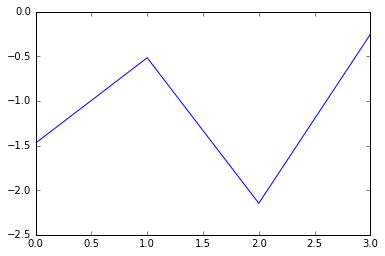

In [850]:
plt.plot(np.arange(4), tseries[6][0])

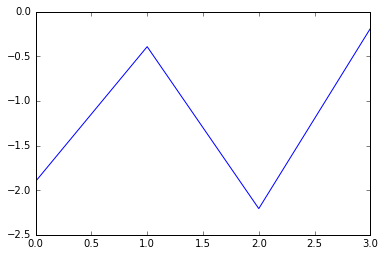

In [851]:
plt.plot(np.arange(4), tseries[598][0])

In [852]:
excluded = {}
return_list = []
def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        if r['B Ret'] < 0:
            excluded.update({r['A']:1})

In [853]:
winf.apply(get_returns, axis=1);

In [854]:
get_stats(pd.Series(return_list))

Trades: 569 
Wins: 352 
Losses: 217 
Breakeven: 0 
Win/Loss Ratio 1.622 
Mean Win: 0.572 
Mean Loss: -0.646 
Mean 0.108 
Std Dev: 0.818 
Max Loss: -2.999 
Max Win: 3.454 
Sharpe Ratio: 2.0877
